<a href="https://colab.research.google.com/github/anwarrior/Internship-Projects-GRIPfeb21-/blob/main/GRIPfeb21_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Using Unsupervised Learning
---

**Author : Anupam Chaturvedi**

Goal Of Study : 
*  Exploratory analysis on the data (Iris Dataset)
*  Build a K-means clustering model



In [50]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [51]:
iris = pd.read_csv("/content/Iris.csv", index_col= 0)

iris_fo = iris.iloc[:,[0,1,2,3]]      #iris data set with features only


#no feature scaling is required for this dataset as they are measured under same unit

In [52]:
iris_fo.describe()   #descriptive analysis 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
iris_fo = iris_fo.values   #converting dataframe to list
Sum_of_squared_distance = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k , random_state= 0,)  #default initialization is kmean++
    km = km.fit(iris_fo)
    Sum_of_squared_distance.append(km.inertia_)  

#using inertia attribute to identify sum of squared distance to nearest cluster centre

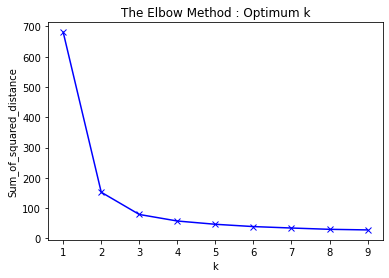

In [54]:
plt.plot(K, Sum_of_squared_errors, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distance')
plt.title('The Elbow Method : Optimum k')
plt.show()

As k increase sum of squared distance tends to Zero


We can clearly observe that, a proper elbow like structure is formed in the graph giving it the very name "The elbow Method".

The optimal k is where elbows occurs.

Therefore by observing the above graph optimum number of clusters is **3**


In [55]:
#Applying k-mean model to iris dataset
km = KMeans(n_clusters=3, random_state = 0)          #default initialization is kmean++
kmp = km.fit_predict(iris_fo)

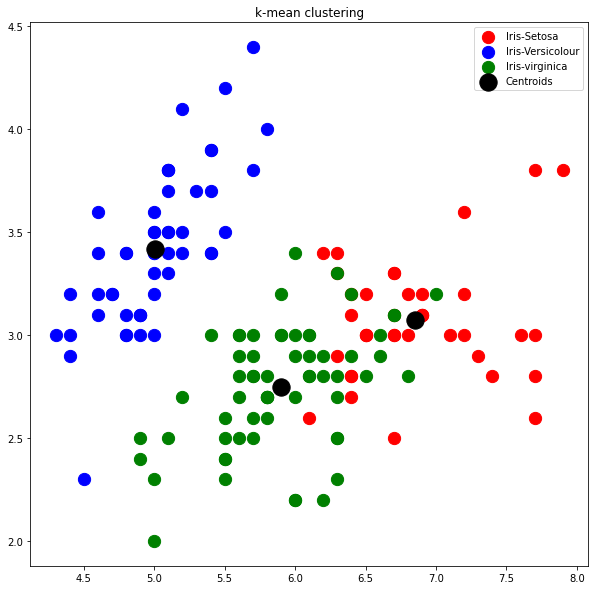

In [56]:
#plotting the results:
plt.figure(figsize=(10,10))

plt.scatter(iris_fo[kmp == 0 , 0] , iris_fo[kmp == 0 , 1] , c = "red" , label = "Iris-Setosa"  , s = 150 )
plt.scatter(iris_fo[kmp == 1 , 0] , iris_fo[kmp == 1 , 1] , c = "blue"  , label = "Iris-Versicolour" , s = 150)
plt.scatter(iris_fo[kmp == 2 , 0] , iris_fo[kmp == 2 , 1] , c = "green" , label = "Iris-virginica"  , s = 150)

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],c = 'black', label = 'Centroids' , s = 300,)
plt.title("k-mean clustering")
plt.legend()
plt.show()